## Customer Behavior Analysis Using Python

#### Dataset: Supermarket Sales Dataset (Kaggle)
#### Tools: Python, Pandas, NumPy, Matplotlib, Seaborn

### Project Overview

This project analyzes customer purchasing behavior in a supermarket to understand:

buying patterns

customer segmentation

spending habits

payment preferences

peak shopping times

The goal is to help businesses optimize marketing strategies, inventory planning, and customer experience.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv(r"C:\analytics\data\supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Basic Inspection

In [3]:
df.shape

(1000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,849-09-3807,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### Data cleaning & Preparation

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [8]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

In [9]:
df.isnull().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

In [10]:
df.duplicated().any()

np.False_

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()

In [16]:
df.head(2)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,month,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,Friday


### Basic Customer Metrics

In [17]:
total_customers = df['invoice_id'].nunique()
total_sales = df['total'].sum()
avg_purchase = df['total'].mean()


In [18]:
print("Total Customers:", total_customers)
print("Total Sales:", round(total_sales,2))
print("Average Purchase Value:", round(avg_purchase,2))

Total Customers: 1000
Total Sales: 322966.75
Average Purchase Value: 322.97


### Customer Type Analysis

In [19]:
cust_type_sales = df.groupby('customer_type')['total'].sum()

In [23]:
sns.set(style="whitegrid")

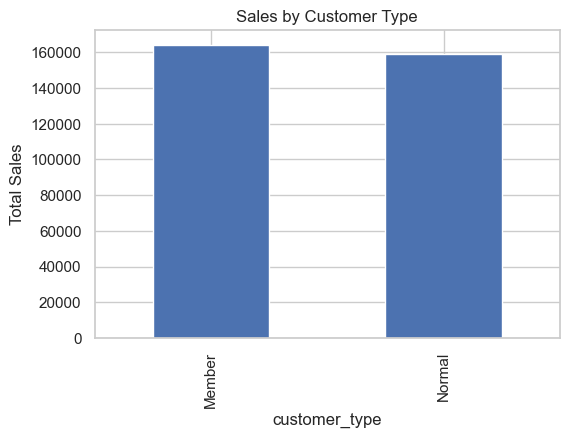

In [26]:
cust_type_sales.plot(kind='bar', figsize=(6,4))
plt.title("Sales by Customer Type")
plt.ylabel("Total Sales")
plt.show()

#### Insight: Members contribute more revenue than normal customers.

### Gender-based Buying Behavior

In [27]:
gender_sales = df.groupby('gender')['total'].sum()

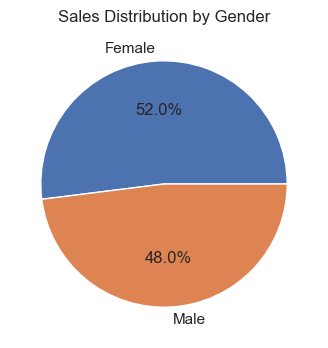

In [28]:
plt.figure(figsize=(5,4))
gender_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Distribution by Gender")
plt.ylabel("")
plt.show()

#### Insight: Female customers contribute more than male customers.

### Product Line Preference

In [30]:
product_sales = df.groupby('product_line')['total'].sum().sort_values()


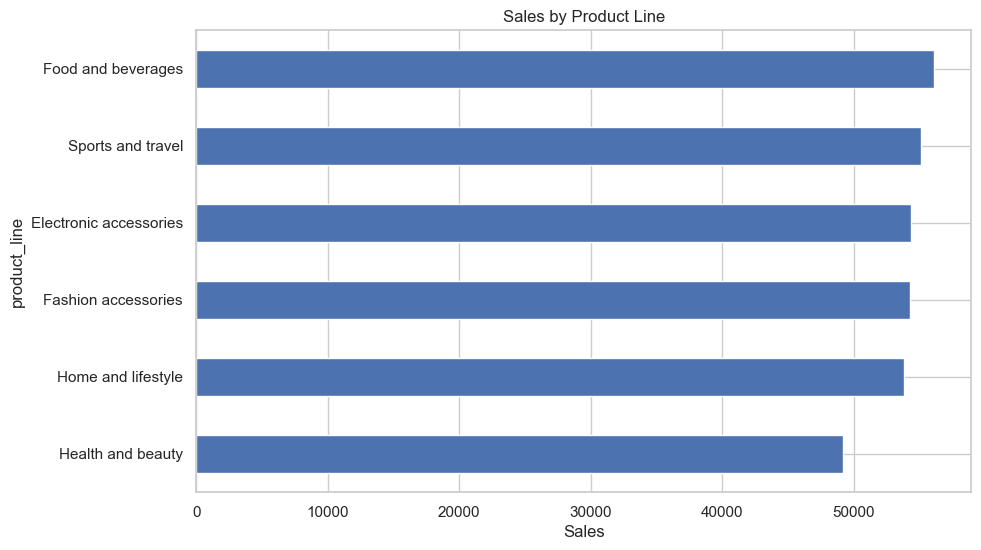

In [31]:
plt.figure(figsize=(10,6))
product_sales.plot(kind='barh')
plt.title("Sales by Product Line")
plt.xlabel("Sales")
plt.show()

#### Insight: Food & Beverages and Sports & Travel are top-selling categories.

### Customer Spending Pattern

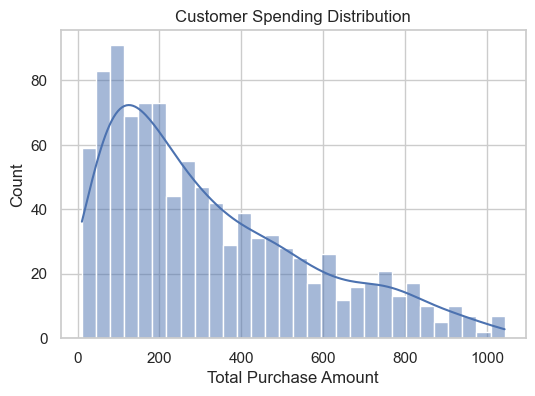

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(df['total'], bins=30, kde=True)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Purchase Amount")
plt.show()

#### Insight: Most customers spend within a mid-price range, few high spenders exist.

In [33]:
df['hour'] = pd.to_datetime(df['time']).dt.hour

C:\Users\jsmpa\AppData\Local\Temp\ipykernel_18440\2517406752.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


### Peak Shopping Time Analysis

In [34]:
hourly_sales = df.groupby('hour')['total'].sum()

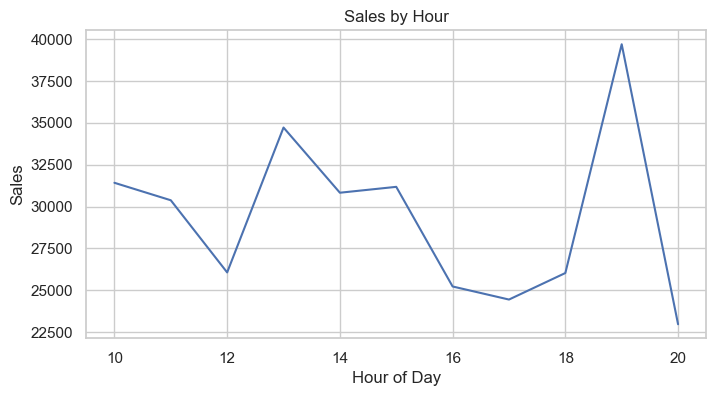

In [35]:
plt.figure(figsize=(8,4))
hourly_sales.plot()
plt.title("Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Sales")
plt.show()

#### Insight: Sales peak during evening hours.

### Payment Method Preference

In [36]:
payment_sales = df.groupby('payment')['total'].sum()

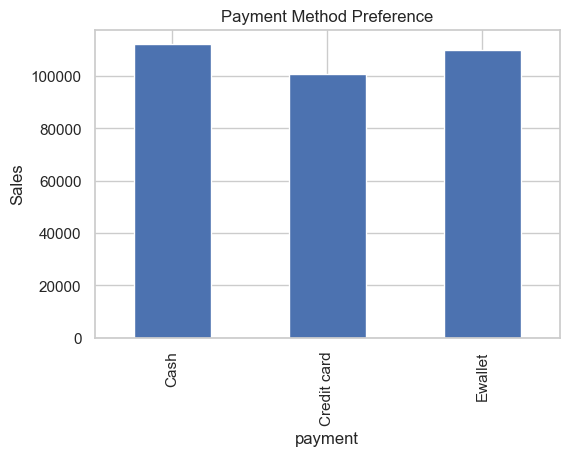

In [37]:
payment_sales.plot(kind='bar', figsize=(6,4))
plt.title("Payment Method Preference")
plt.ylabel("Sales")
plt.show()

#### Insight: E-wallet and Cash are the most preferred payment methods.

### Customer Satisfaction Analysis

In [38]:
avg_rating = df.groupby('product_line')['rating'].mean().sort_values()

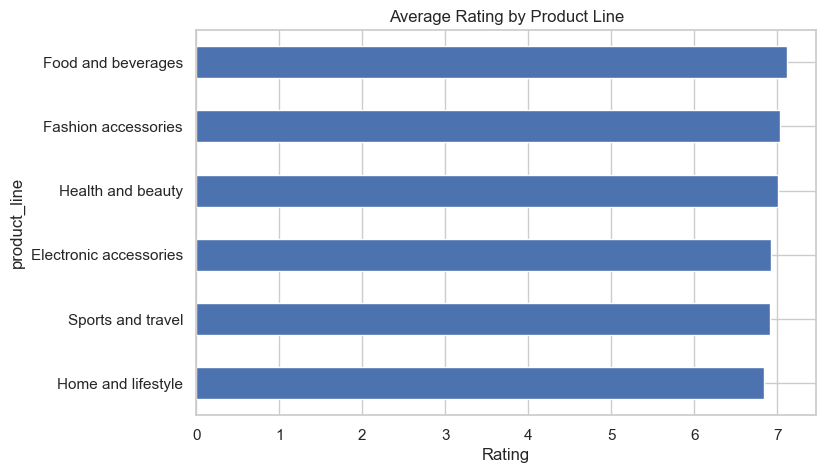

In [39]:
plt.figure(figsize=(8,5))
avg_rating.plot(kind='barh')
plt.title("Average Rating by Product Line")
plt.xlabel("Rating")
plt.show()

### Key KPIs

In [40]:
member_ratio = df['customer_type'].value_counts(normalize=True) * 100

In [41]:
print("Customer Type Distribution (%)")
print(member_ratio)

Customer Type Distribution (%)
customer_type
Member    50.1
Normal    49.9
Name: proportion, dtype: float64


### Key Insights

- Member customers generate higher revenue
- Evening hours show maximum purchasing activity
- Certain product lines drive both high sales and high ratings
- Digital payments dominate customer preference
- Customer spending is moderately distributed with few high spenders

### Business Recommendations

- Introduce loyalty rewards for high-spending members
- Promote top-rated product lines aggressively
- Run flash sales during peak evening hours
- Encourage digital payment discounts
- Target low-selling categories with bundled offers